# Tutorial: Multiple Criticality Measures
This tutorial demonstrates how to use CommonRoad-CriMe to evaluate the criticality of a considered ego vehicle given a CommonRoad scenario/scene and multiple measures. Please make sure that you have correctly gone through the tutorial Nr. 0.

## Import and Building Configuration

In [1]:
from commonroad_crime.data_structure.configuration_builder import ConfigurationBuilder
from commonroad_crime.data_structure.crime_interface import CriMeInterface
from commonroad_crime.measure import (HW, TTC, TTR, ALongReq, LongJ, BTN, P_MC, PF)

# ==== specify scenario
scenario_id = "DEU_Gar-1_1_T-1"

# ==== build configuration
config = ConfigurationBuilder.build_configuration(scenario_id)
config.update()
config.print_configuration_summary()

# ===== Configuration Summary ===== #
# Scene/Scenario: DEU_Gar-1_1_T-1
# ego vehicle: id 200
# ================================= #


## Compute the criticality with various measures

Invoking criticality measurement is done via the ``CriMeInterface`` class. We should the evaluation process with the following exemplary metrics:
- `HW`: Headway
- `TTC`: Time-To-Collision
- `TTR`: Time-To-React
- `ALongReq`: Required Longitudinal Acceleration
- `LongJ`: Longitudinal Jerk
- `LatJ`: Lateral Jerk
- `BTN`: Brake Threat Number
- `STN`: Steer Threat Number
- `P_MC`: Collision Probability via Monte Carlo Simulation
- `PF`: Potential Functions as Superposition of Scoring Functions

### 1. Evaluation on Scene (first time step)

In [2]:
crime_interface = CriMeInterface(config)
crime_interface.evaluate_scene([HW, TTC, TTR, ALongReq, LongJ, BTN, P_MC, PF],)

* Given measures for time step 0: headway, time-to-collision, time-to-react, required longitudinal acceleration (aka deceleration-rate-to-avoid-crash), longitudinal jerk, brake threat number, collision probability via Monte Carlo, potential functions as superposition of scoring functions...
*********************************
* Computing the headway at time step 0
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
* Computing the headway at time step 0
*		 headway with vehicle id 202 = 22.16
* Computing the headway at time step 0
*		 headway with vehicle id 203 = inf
*		 headway of the scenario: 22.16
	Took: 	0.002s
*********************************
* Computing the time-to-collision at time step 0
* Computing the headway at time step 0
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
*		 time-to-collision = inf
* Computing the time-to-collision at time step 0
* Computing the headway at time step 0
*		 headway with vehicl

### 2. Evaluation on Scenario

In [3]:
ts_start = 0 # starting time step
ts_end = 10  # ending time step
crime_interface.evaluate_scenario([HW, TTC, TTR, ALongReq, LongJ, BTN, P_MC, PF], ts_start, ts_end)

* Given measures for the whole scenario: headway, time-to-collision, time-to-react, required longitudinal acceleration (aka deceleration-rate-to-avoid-crash), longitudinal jerk, brake threat number, collision probability via Monte Carlo, potential functions as superposition of scoring functions...
* Computing the headway at time step 1
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
* Computing the headway at time step 1
*		 headway with vehicle id 202 = 21.56
* Computing the headway at time step 1
*		 headway with vehicle id 203 = inf
*		 headway of the scenario: 21.56
* Computing the time-to-collision at time step 1
* Computing the headway at time step 1
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
*		 time-to-collision = inf
* Computing the time-to-collision at time step 1
* Computing the headway at time step 1
*		 headway with vehicle id 202 = 21.56
*		 time-to-collision = 3.6
* Computing the time-to-collisi

*		 collision probability via Monte Carlo = 0.0112
*		 collision probability via Monte Carlo of the scenario: 0.0112
* Computing the potential functions as superposition of scoring functions at time step 2
*		 potential functions as superposition of scoring functions = 13.36
*		 potential functions as superposition of scoring functions of the scenario: 13.36
* Computing the headway at time step 3
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
* Computing the headway at time step 3
*		 headway with vehicle id 202 = 20.37
* Computing the headway at time step 3
*		 headway with vehicle id 203 = inf
*		 headway of the scenario: 20.37
* Computing the time-to-collision at time step 3
* Computing the headway at time step 3
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
*		 time-to-collision = inf
* Computing the time-to-collision at time step 3
* Computing the headway at time step 3
*		 headway with vehicle id 202 = 20.

*		 collision probability via Monte Carlo = 0.0108
*		 collision probability via Monte Carlo of the scenario: 0.0108
* Computing the potential functions as superposition of scoring functions at time step 4
*		 potential functions as superposition of scoring functions = 33.81
*		 potential functions as superposition of scoring functions of the scenario: 33.81
* Computing the headway at time step 5
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
* Computing the headway at time step 5
*		 headway with vehicle id 202 = 19.17
* Computing the headway at time step 5
*		 headway with vehicle id 203 = inf
*		 headway of the scenario: 19.17
* Computing the time-to-collision at time step 5
* Computing the headway at time step 5
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
*		 time-to-collision = inf
* Computing the time-to-collision at time step 5
* Computing the headway at time step 5
*		 headway with vehicle id 202 = 19.

*		 collision probability via Monte Carlo = 0.0108
*		 collision probability via Monte Carlo of the scenario: 0.0108
* Computing the potential functions as superposition of scoring functions at time step 6
*		 potential functions as superposition of scoring functions = 60.9
*		 potential functions as superposition of scoring functions of the scenario: 60.9
* Computing the headway at time step 7
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
* Computing the headway at time step 7
*		 headway with vehicle id 202 = 17.99
* Computing the headway at time step 7
*		 headway with vehicle id 203 = inf
*		 headway of the scenario: 17.99
* Computing the time-to-collision at time step 7
* Computing the headway at time step 7
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
*		 time-to-collision = inf
* Computing the time-to-collision at time step 7
* Computing the headway at time step 7
*		 headway with vehicle id 202 = 17.99

*		 collision probability via Monte Carlo = 0.0084
*		 collision probability via Monte Carlo of the scenario: 0.0084
* Computing the potential functions as superposition of scoring functions at time step 8
*		 potential functions as superposition of scoring functions = 168.18
*		 potential functions as superposition of scoring functions of the scenario: 168.18
* Computing the headway at time step 9
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
* Computing the headway at time step 9
*		 headway with vehicle id 202 = 16.81
* Computing the headway at time step 9
*		 headway with vehicle id 203 = inf
*		 headway of the scenario: 16.81
* Computing the time-to-collision at time step 9
* Computing the headway at time step 9
*		 vehicle 201 is not in the same lanelet as the ego vehicle 200
*		 headway = inf
*		 time-to-collision = inf
* Computing the time-to-collision at time step 9
* Computing the headway at time step 9
*		 headway with vehicle id 202 = 1

*		 collision probability via Monte Carlo = 0.0079
*		 collision probability via Monte Carlo of the scenario: 0.0079
* Computing the potential functions as superposition of scoring functions at time step 10
*		 potential functions as superposition of scoring functions = 500
*		 potential functions as superposition of scoring functions of the scenario: 500
*********************************
	 Summary:
* At time step 0: headway = 22.16, time-to-collision = 3.7, time-to-react = inf, required longitudinal acceleration (aka deceleration-rate-to-avoid-crash) = -0.81, longitudinal jerk = 0.0, brake threat number = 0.0704, collision probability via Monte Carlo = 0.0089, potential functions as superposition of scoring functions = -9.73
* At time step 1: headway = 21.56, time-to-collision = 3.6, time-to-react = inf, required longitudinal acceleration (aka deceleration-rate-to-avoid-crash) = -0.83, longitudinal jerk = 0.0, brake threat number = 0.0722, collision probability via Monte Carlo = 0.007

## Visualization
### 1. the evaluation results for debugging and showcasting

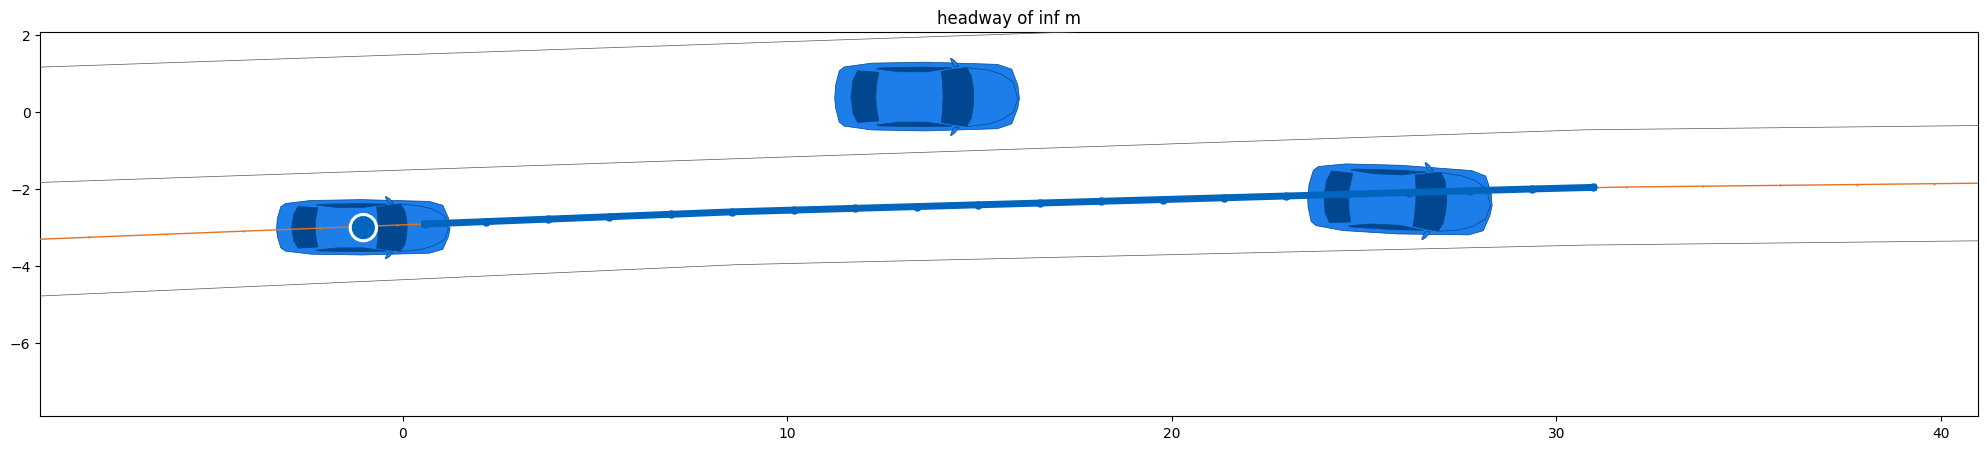

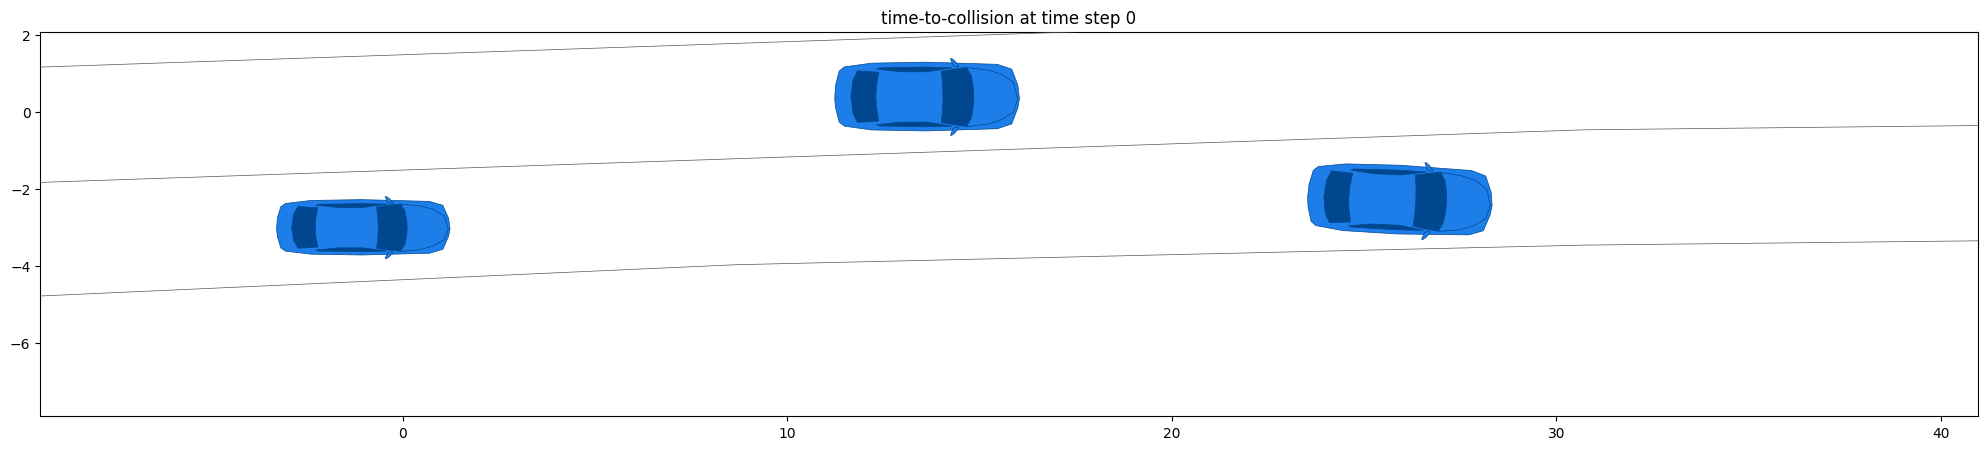

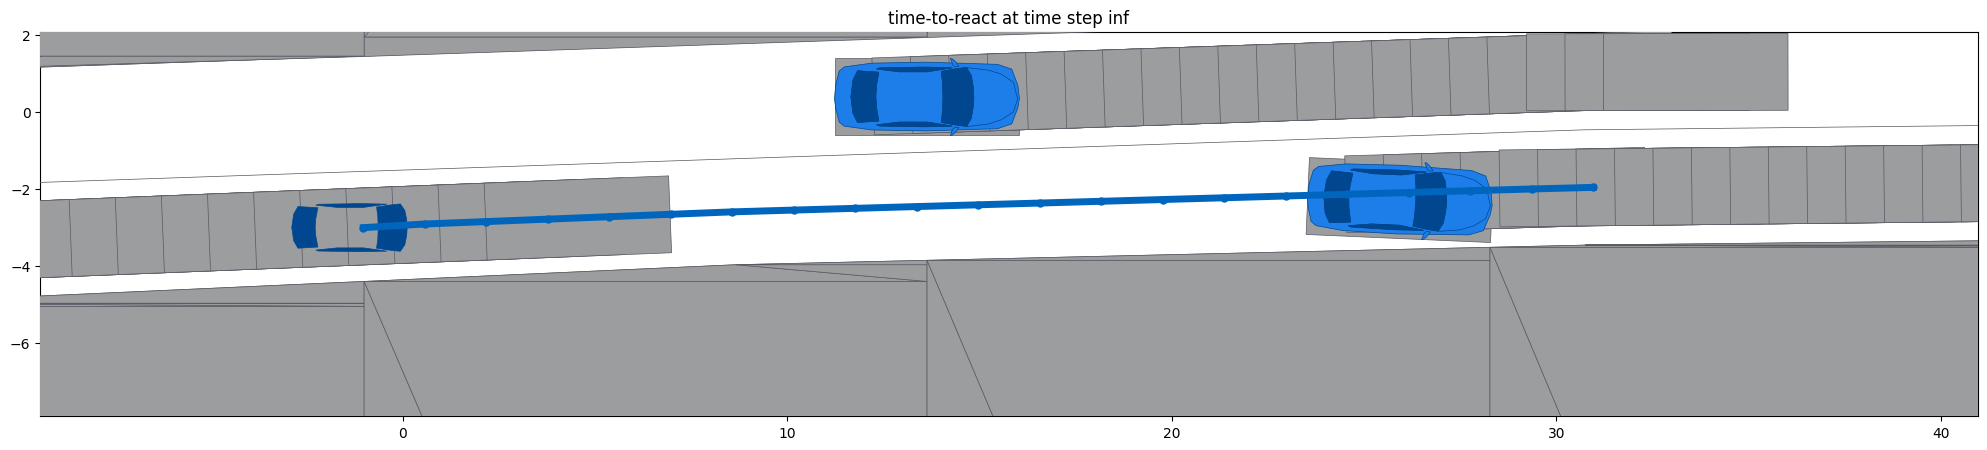

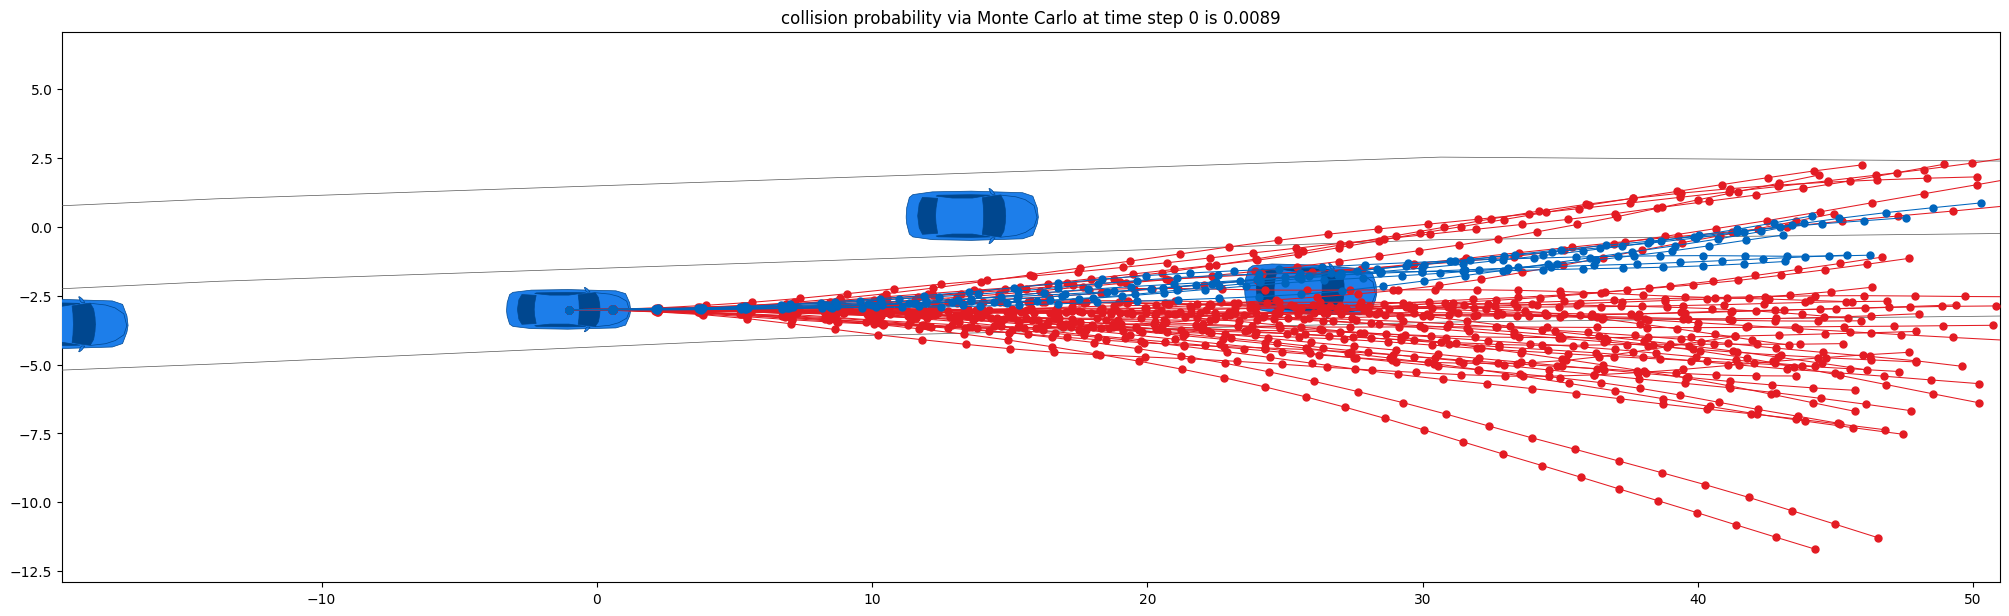

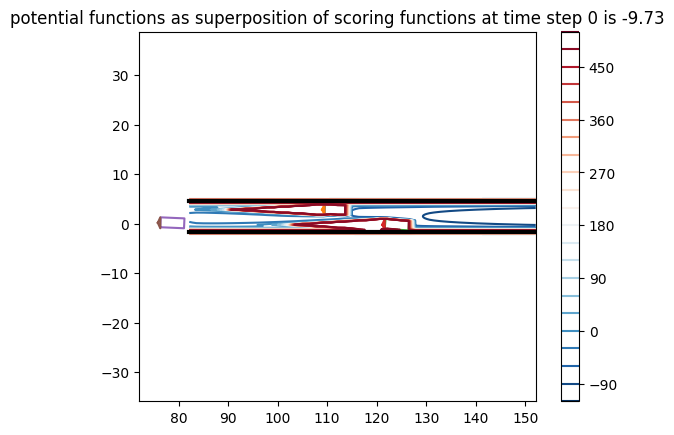

In [4]:
select_ts = 0
config.debug.save_plots = False
crime_interface.visualize(select_ts)

### 2. criticality curves

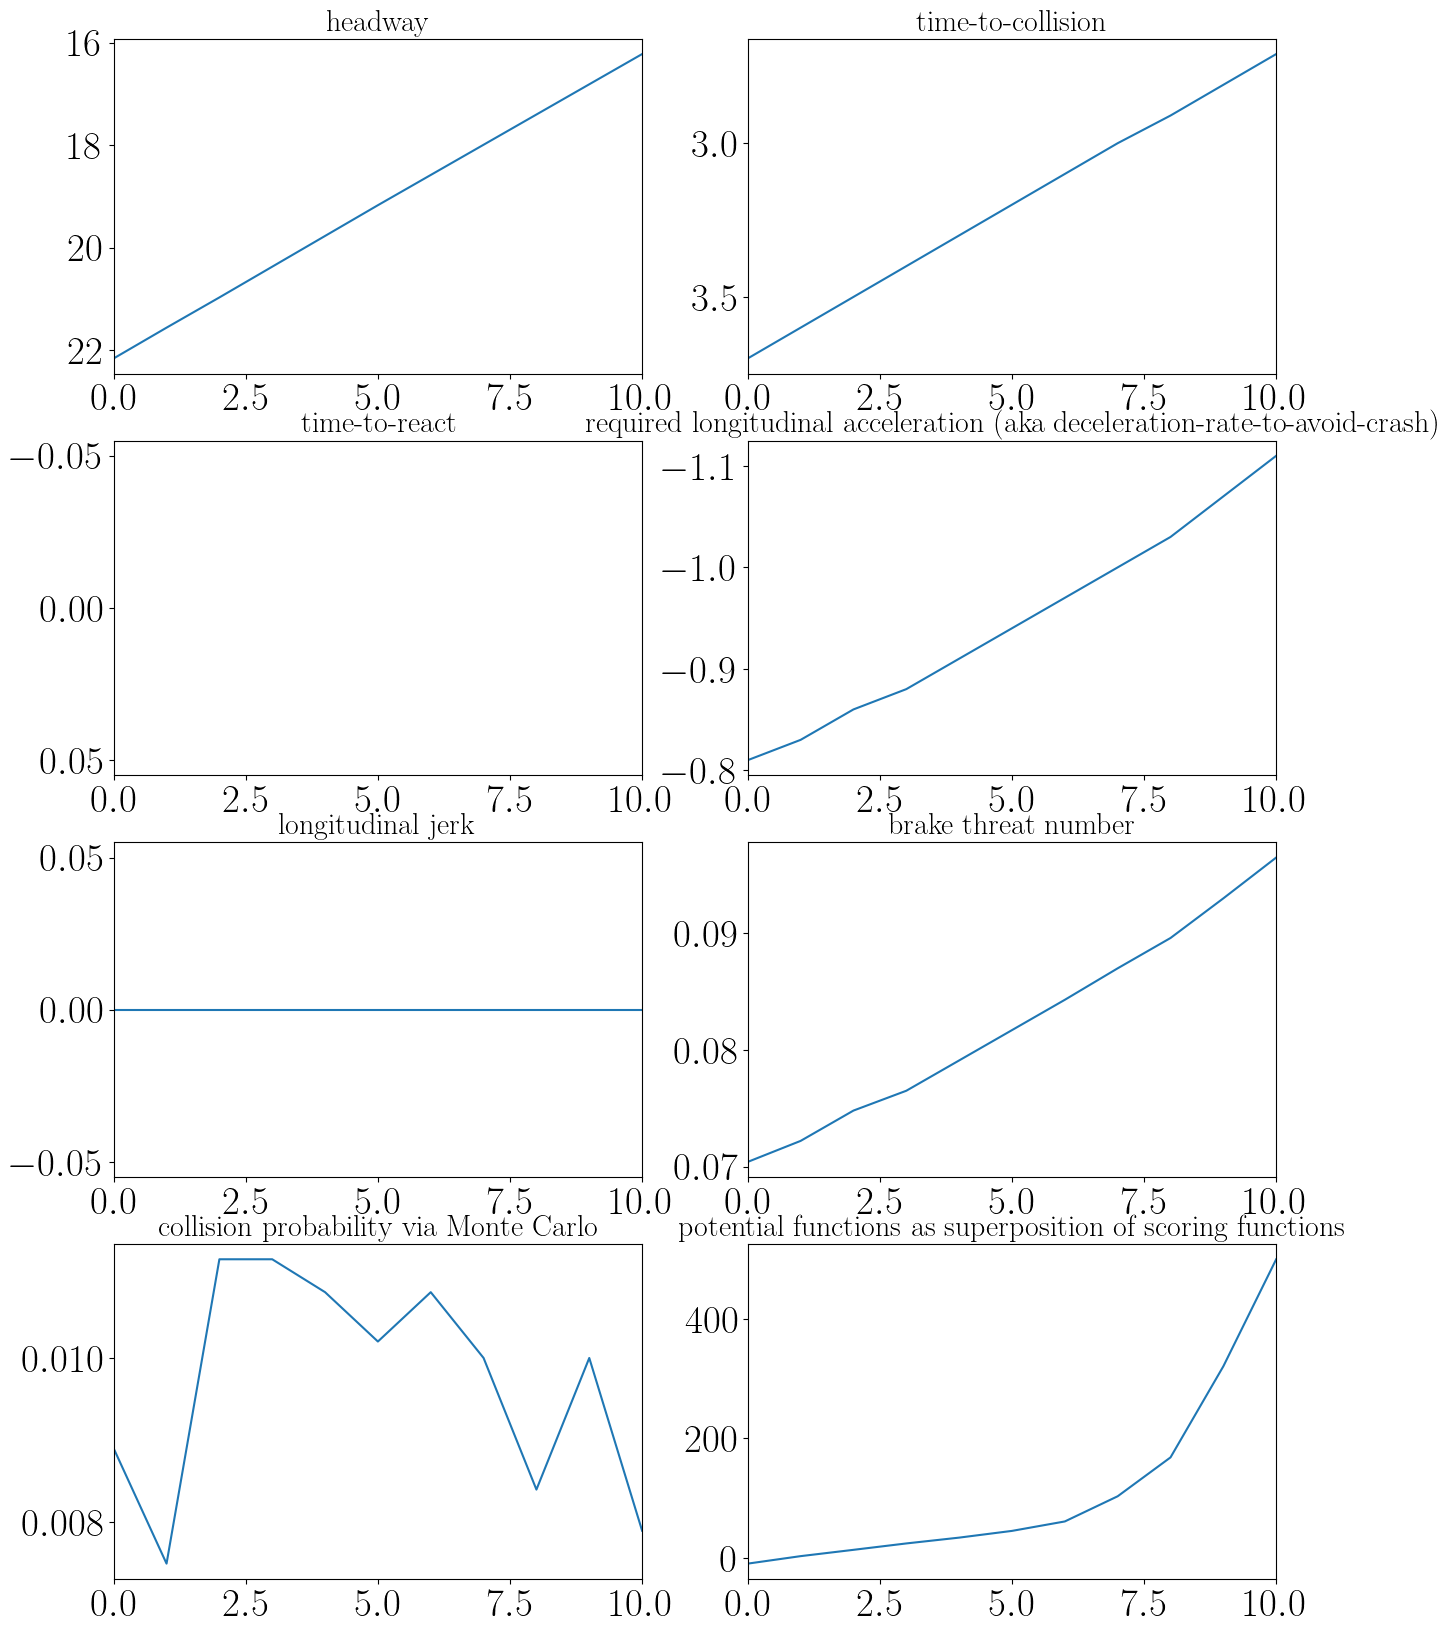

In [5]:
import commonroad_crime.utility.visualization as utils_vis

utils_vis.plot_criticality_curve(crime_interface)
